In [1]:
import pandas as pd
from joblib import load, dump
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [2]:
jan_data = pd.read_parquet('./data/green_tripdata_2022-02.parquet')
print(jan_data.shape)
jan_data.describe()


(69399, 20)


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,69399.000000,69399,69399,61978.000000,69399.000000,69399.000000,61978.00000,69399.000000,69399.000000,69399.000000,69399.000000,69399.000000,69399.000000,69399.000000,69399.000000,61978.000000,61978.000000,61978.000000
mean,1.850517,2022-02-14 22:21:25.209613,2022-02-14 22:41:19.206689,1.198796,98.913904,136.606003,1.26795,96.154986,14.070630,0.356017,0.423729,1.801974,0.202369,0.297471,17.788976,1.391187,1.042386,0.719102
min,1.000000,2009-01-01 00:02:32,2009-01-01 14:31:35,1.000000,1.000000,1.000000,0.00000,0.000000,-165.000000,-4.500000,-0.500000,-0.990000,0.000000,-0.300000,-165.300000,1.000000,1.000000,-2.750000
25%,2.000000,2022-02-08 02:29:01,2022-02-08 03:16:25,1.000000,61.000000,74.000000,1.00000,1.100000,7.500000,0.000000,0.500000,0.000000,0.000000,0.300000,9.780000,1.000000,1.000000,0.000000
50%,2.000000,2022-02-14 23:50:36,2022-02-15 00:08:39,1.000000,75.000000,138.000000,1.00000,1.930000,10.500000,0.000000,0.500000,1.160000,0.000000,0.300000,14.160000,1.000000,1.000000,0.000000
75%,2.000000,2022-02-22 06:54:11.500000,2022-02-22 07:15:26.500000,1.000000,130.000000,215.000000,1.00000,3.560000,17.000000,0.500000,0.500000,2.760000,0.000000,0.300000,21.350000,2.000000,1.000000,2.750000
max,2.000000,2022-03-01 10:04:17,2022-03-01 20:09:43,6.000000,265.000000,265.000000,9.00000,259777.570000,420.000000,4.500000,3.550000,250.000000,38.750000,0.300000,421.300000,5.000000,2.000000,2.750000
std,0.356567,NaN,NaN,0.861625,63.128032,77.125833,0.89894,3335.401400,12.266505,0.661292,0.184683,3.118095,1.186615,0.035359,13.988396,0.507374,0.201470,1.208780


In [3]:
print("If there any NULL values : ",(jan_data.isna().values.any()))
jan_data.isna().any()

If there any NULL values :  True


VendorID                 False
lpep_pickup_datetime     False
lpep_dropoff_datetime    False
store_and_fwd_flag        True
RatecodeID                True
PULocationID             False
DOLocationID             False
passenger_count           True
trip_distance            False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
ehail_fee                 True
improvement_surcharge    False
total_amount             False
payment_type              True
trip_type                 True
congestion_surcharge      True
dtype: bool

In [4]:
# create target
jan_data["duration_min"] = jan_data.lpep_dropoff_datetime - jan_data.lpep_pickup_datetime
jan_data.duration_min = jan_data.duration_min.apply(lambda td : float(td.total_seconds())/60)

jan_data.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration_min
count,69399.000000,69399,69399,61978.000000,69399.000000,69399.000000,61978.00000,69399.000000,69399.000000,69399.000000,69399.000000,69399.000000,69399.000000,69399.000000,69399.000000,61978.000000,61978.000000,61978.000000,69399.000000
mean,1.850517,2022-02-14 22:21:25.209613,2022-02-14 22:41:19.206689,1.198796,98.913904,136.606003,1.26795,96.154986,14.070630,0.356017,0.423729,1.801974,0.202369,0.297471,17.788976,1.391187,1.042386,0.719102,19.899951
min,1.000000,2009-01-01 00:02:32,2009-01-01 14:31:35,1.000000,1.000000,1.000000,0.00000,0.000000,-165.000000,-4.500000,-0.500000,-0.990000,0.000000,-0.300000,-165.300000,1.000000,1.000000,-2.750000,0.000000
25%,2.000000,2022-02-08 02:29:01,2022-02-08 03:16:25,1.000000,61.000000,74.000000,1.00000,1.100000,7.500000,0.000000,0.500000,0.000000,0.000000,0.300000,9.780000,1.000000,1.000000,0.000000,7.400000
50%,2.000000,2022-02-14 23:50:36,2022-02-15 00:08:39,1.000000,75.000000,138.000000,1.00000,1.930000,10.500000,0.000000,0.500000,1.160000,0.000000,0.300000,14.160000,1.000000,1.000000,0.000000,12.050000
75%,2.000000,2022-02-22 06:54:11.500000,2022-02-22 07:15:26.500000,1.000000,130.000000,215.000000,1.00000,3.560000,17.000000,0.500000,0.500000,2.760000,0.000000,0.300000,21.350000,2.000000,1.000000,2.750000,19.250000
max,2.000000,2022-03-01 10:04:17,2022-03-01 20:09:43,6.000000,265.000000,265.000000,9.00000,259777.570000,420.000000,4.500000,3.550000,250.000000,38.750000,0.300000,421.300000,5.000000,2.000000,2.750000,1439.850000
std,0.356567,NaN,NaN,0.861625,63.128032,77.125833,0.89894,3335.401400,12.266505,0.661292,0.184683,3.118095,1.186615,0.035359,13.988396,0.507374,0.201470,1.208780,78.877979


In [5]:
# filter out outliers
jan_data = jan_data[(jan_data.duration_min >= 0) & (jan_data.duration_min <= 60)]
jan_data = jan_data[(jan_data.passenger_count > 0) & (jan_data.passenger_count <= 8)]
jan_data.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration_min
count,60689.000000,60689,60689,60689.000000,60689.000000,60689.000000,60689.000000,60689.000000,60689.000000,60689.000000,60689.000000,60689.000000,60689.000000,60689.000000,60689.000000,60689.000000,60689.000000,60689.000000,60689.000000
mean,1.839164,2022-02-15 02:20:27.378322,2022-02-15 02:34:12.088385,1.193313,97.333751,136.641434,1.273460,3.178086,12.892591,0.395863,0.473890,1.624803,0.158156,0.297281,16.456681,1.389115,1.041391,0.721642,13.745168
min,1.000000,2022-01-10 12:03:51,2022-01-10 12:13:22,1.000000,1.000000,1.000000,1.000000,0.000000,-165.000000,-4.500000,-0.500000,-0.990000,0.000000,-0.300000,-165.300000,1.000000,1.000000,-2.750000,0.000000
25%,2.000000,2022-02-08 09:17:29,2022-02-08 09:30:12,1.000000,65.000000,74.000000,1.000000,1.060000,7.000000,0.000000,0.500000,0.000000,0.000000,0.300000,9.300000,1.000000,1.000000,0.000000,7.016667
50%,2.000000,2022-02-15 09:10:59,2022-02-15 09:22:14,1.000000,75.000000,138.000000,1.000000,1.800000,10.000000,0.000000,0.500000,1.000000,0.000000,0.300000,13.350000,1.000000,1.000000,0.000000,11.383333
75%,2.000000,2022-02-22 08:58:52,2022-02-22 09:15:19,1.000000,129.000000,216.000000,1.000000,3.200000,15.500000,0.500000,0.500000,2.510000,0.000000,0.300000,19.860000,2.000000,1.000000,2.750000,17.833333
max,2.000000,2022-03-01 10:04:17,2022-03-01 10:04:20,6.000000,265.000000,265.000000,8.000000,35594.660000,420.000000,4.500000,3.550000,250.000000,38.750000,0.300000,421.300000,5.000000,2.000000,2.750000,59.966667
std,0.367383,NaN,NaN,0.850978,61.341899,77.234221,0.898519,144.500144,10.721907,0.680204,0.120013,3.026631,1.038947,0.036998,12.274767,0.506939,0.199195,1.210058,9.876397


<Axes: >

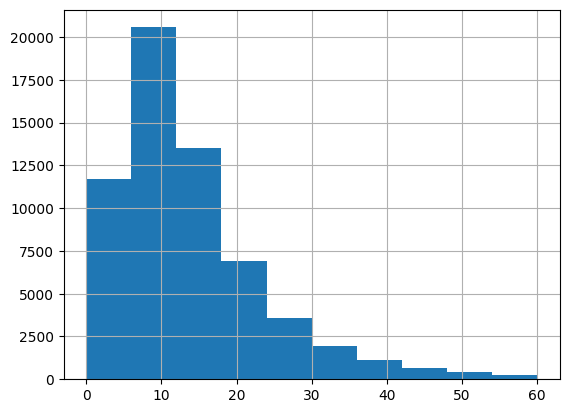

In [6]:
jan_data.duration_min.hist()

In [7]:
print(jan_data.shape)



(60689, 21)


In [8]:
train_data = jan_data[:30000]
val_data = jan_data[30000:]

In [9]:
# data labeling
target = "duration_min"
num_features = ["passenger_count", "trip_distance", "fare_amount", "total_amount"]
cat_features = ["PULocationID", "DOLocationID"]

dates = ["lpep_pickup_datetime","lpep_dropoff_datetime"]

In [10]:
train_df = train_data[num_features + cat_features + dates]


val_df = val_data[num_features + cat_features+ dates]
train_df.head()

,passenger_count,trip_distance,fare_amount,total_amount,PULocationID,DOLocationID,lpep_pickup_datetime,lpep_dropoff_datetime
0,1.0,1.16,5.5,7.82,43,238,2022-02-01 00:20:21,2022-02-01 00:24:30
1,1.0,0.57,4.5,5.80,166,24,2022-02-01 00:32:26,2022-02-01 00:35:31
2,1.0,0.00,42.2,43.00,226,219,2022-02-01 00:17:27,2022-02-01 00:44:44
3,1.0,16.62,49.0,50.30,89,83,2022-02-01 00:45:37,2022-02-01 01:27:16
4,1.0,5.97,21.0,29.55,7,238,2022-02-01 00:06:46,2022-02-01 00:30:06


In [11]:
model = LinearRegression()
model.fit(train_df[num_features + cat_features ], train_data[target])

LinearRegression()

In [12]:
train_preds = model.predict(train_df[num_features + cat_features ])
train_data['prediction'] = train_preds


val_preds = model.predict(val_df[num_features + cat_features ])
val_data['prediction'] = val_preds

/var/folders/xd/3z5vvpds0zxf_pypxd4cn3d80000gn/T/ipykernel_1483/2070502915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['prediction'] = train_preds
/var/folders/xd/3z5vvpds0zxf_pypxd4cn3d80000gn/T/ipykernel_1483/2070502915.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data['prediction'] = val_preds


In [13]:
print(mean_absolute_error(train_data.duration_min, train_data.prediction))
print(mean_absolute_error(val_data.duration_min, val_data.prediction))

4.260492736927544
6.069222459815016


### Write the model and output

In [14]:
with open('models/lin_reg.bin', 'wb') as f_out:
    dump(model, f_out)

val_df.to_parquet('data/reference.parquet')

In [15]:
val_data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration_min,prediction
30683,2,2022-02-15 00:41:08,2022-02-15 00:49:44,N,1.0,236,229,1.0,3.16,11.5,...,3.89,0.00,None,0.3,19.44,1.0,1.0,2.75,8.600000,13.790874
30684,2,2022-02-15 01:29:04,2022-02-15 02:10:00,N,1.0,179,116,1.0,8.21,33.0,...,0.00,6.55,None,0.3,40.85,2.0,1.0,0.00,40.933333,30.427895
30685,2,2022-02-15 01:13:21,2022-02-15 01:22:16,N,1.0,129,129,1.0,1.39,8.0,...,0.00,0.00,None,0.3,9.30,2.0,1.0,0.00,8.916667,9.833248
30686,2,2022-02-15 01:45:36,2022-02-15 01:45:39,N,5.0,74,74,1.0,0.00,16.0,...,0.00,0.00,None,0.3,16.30,1.0,2.0,0.00,0.050000,10.974832
30687,2,2022-02-14 14:30:26,2022-02-14 14:35:18,N,1.0,75,75,1.0,1.27,6.0,...,0.00,0.00,None,0.3,7.30,2.0,1.0,0.00,4.866667,9.116592


In [16]:
original_df = jan_data[num_features + cat_features+dates]
original_df.to_parquet('data/original_data.parquet')

In [22]:
import datetime
i = 1
begin = datetime.datetime(2022, 2, 1, 0, 0)
print("Date Increase by i : ",begin+datetime.timedelta(i))


current_data = original_df[(original_df.lpep_pickup_datetime >= (begin + datetime.timedelta(i))) &
		(original_df.lpep_pickup_datetime < (begin + datetime.timedelta(i + 1)))]

current_data.head()

Date Increase by i :  2022-02-02 00:00:00


,passenger_count,trip_distance,fare_amount,total_amount,PULocationID,DOLocationID,lpep_pickup_datetime,lpep_dropoff_datetime
2121,1.0,1.41,8.0,9.30,42,168,2022-02-02 00:00:31,2022-02-02 00:08:31
2122,1.0,5.28,17.0,21.05,75,114,2022-02-02 00:04:09,2022-02-02 00:21:28
2123,1.0,3.73,24.0,25.30,157,196,2022-02-02 00:46:49,2022-02-02 01:22:46
2124,1.0,5.60,20.0,27.69,66,35,2022-02-02 00:47:35,2022-02-02 01:10:41
2125,1.0,0.23,15.0,18.36,92,92,2022-02-02 00:23:14,2022-02-02 00:25:33
